# Word Embeddings in Python with Gensim

## 1. Desarrollo de un Word2Vec Embedding
- Word2Vec es un algoritmo que usa un modelo de red neuronal para aprender asociaciones de palabras desde un Corpus de Texto.
- Una vez entrenado, el modelo puede detectar sinónimos o sugerir palabras.
- Word2Vec representa cada palabra con un vector

### Ejemplo con un pequeño corpus

In [24]:
from gensim.models import Word2Vec
# define training data
sentences = [['the', 'football', 'player', 'scored', 'a', 'goal'],
            ['the', 'football', 'match', 'was', 'amazing'],
            ['the', 'player', 'scored','one','goal','in','the','match'],
            ['one', 'more', 'goal','in','the','soccer','match'],
            ['the','soccer','player','scored','a','goal'],
            ['and', 'the', 'final', 'of','match'],
            ['the','soccer','match','was','great']]
# train model: The model is trained and the minimum count for words is set to 1 so that no words are ignored. 
model = Word2Vec(sentences, min_count=1) # vector size = 100 (Default)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print('Vector for the word sentence:')
print(model['goal'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=17, size=100, alpha=0.025)
['the', 'football', 'player', 'scored', 'a', 'goal', 'match', 'was', 'amazing', 'one', 'in', 'more', 'soccer', 'and', 'final', 'of', 'great']
Vector for the word sentence:
[ 1.9243447e-03 -3.7913953e-03  4.9311086e-03  4.6017594e-03
  4.0592998e-03 -2.1583703e-03  3.1225998e-03 -4.9824906e-03
  4.8879897e-03 -1.3633338e-03  2.8271237e-04  7.5601286e-04
  2.1116512e-03  4.7717160e-03  1.8656250e-03 -2.8284653e-03
  3.3472637e-03 -2.3262384e-03 -4.5936634e-03 -3.3394150e-03
  3.4295358e-03 -1.4922947e-03  3.9128242e-03  4.3572136e-03
 -1.8241834e-03 -7.0066622e-04 -4.3484112e-03  2.7028457e-03
 -1.1150263e-03  4.0903948e-03  2.3460337e-03 -2.0857898e-03
  5.6310074e-04  1.0748495e-03 -2.6524654e-03 -9.2243368e-04
 -4.6838522e-03  4.0064189e-03 -2.9443266e-04 -3.3962887e-03
  3.4953924e-03  3.8825024e-03  3.7540507e-03  1.8662625e-03
  1.2924740e-03 -2.6549802e-03  2.5753553e-03 -2.2166255e-03
  3.7955327e-03  4.8326640e-03  3.2043091e-03  1.43281

<ipython-input-24-0873cf08207d>:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['goal'])


## 2. Visualiza tu Word Embedding
- Para representar nuestro word embedding vamos a reducir la dimensionalidad de los vectores de palabras
- Podemos usar PCA para esto

<ipython-input-25-c97541bfd7ed>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


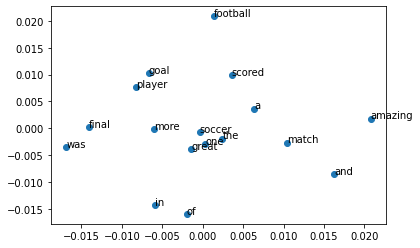

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plot
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

## 3. Google Word2Vec Embedding
- [Documentation](https://code.google.com/archive/p/word2vec/)
- Entrenar tu modelo con tu propio corpus puede ser la mejor aproximación a un problema de NLP. Pero requiere mucho tiempo y ordenadores potentes
- Una alternativa es usar modelos pre-entrenados de word embedding
- Un modelo pre-entrenado es un archivo que contiene tokens asociados con vectores de palabras
- Google Word2Vec News Data Model contiene 3 millones de palabras y usa 300 size vectors (1,5GB!)

In [27]:
from gensim.models import KeyedVectors
filename = '../../word-embeddings/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

Queen = (King - Man) + Woman

In [28]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


Actress = (Actor - Man) + Woman

In [37]:
result = model.most_similar(positive=['woman', 'actor'], negative=['man'], topn=1)
print(result)

[('actress', 0.860262393951416)]


___Cosine Similarity: word vs word___

Compute cosine similarity between two words.

In [48]:
model.similarity('soccer','football')

0.73135483

In [49]:
model.similarity('king','water')

0.035605885

___Cosine Similarity: list of words vs list of words___

Compute cosine similarity between two sets of words.

In [51]:
model.n_similarity(['soccer','team'],['football','match'])

0.70668525

___Word Mover's Distance between two documents___

In [56]:
# Some sentences to test.
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()
# Remove their stopwords.
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stopwords]
sentence_president = [w for w in sentence_president if w not in stopwords]
# Compute WMD.
distance = model.wmdistance(sentence_obama, sentence_president)
print(distance)

3.3741233214730024


## 4. Standford's GloVe Embedding
- [Documentation](https://nlp.stanford.edu/projects/glove/)
- Es el algoritmo de word embedding desarrollado por la universidad de Stanford
- Puedes descargar el algoritmo pre-entrenado y cargarlo en gensim
- El primer paso es convertir el fichero GloVe al formato Word2Vec

In [61]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '../../word-embeddings/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

In [63]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model_gl = KeyedVectors.load_word2vec_format(filename, binary=False)

Calculate: (king - man) + woman = ?

In [64]:
result = model_gl.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


___Cosine Similarity: word vs word___

Compute cosine similarity between two words.

In [65]:
model_gl.similarity('soccer','football')

0.8732221

In [66]:
model_gl.similarity('king','water')

0.25714418

___Cosine Similarity: list of words vs list of words___

Compute cosine similarity between two sets of words.

In [67]:
model_gl.n_similarity(['soccer','team'],['football','match'])

0.8874296

___Word Mover's Distance between two documents___

In [68]:
# Some sentences to test.
sentence_obama = 'Obama speaks to the media in Illinois'.lower().split()
sentence_president = 'The president greets the press in Chicago'.lower().split()
# Remove their stopwords.
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stopwords]
sentence_president = [w for w in sentence_president if w not in stopwords]
# Compute WMD.
distance = model_gl.wmdistance(sentence_obama, sentence_president)
print(distance)

5.004111539999365


## 5. Plot a list of words from Google Pretrained model

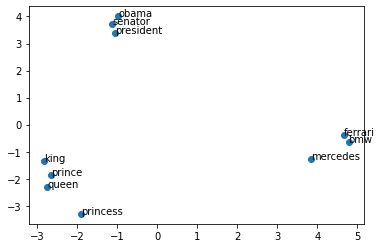

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
lista = ['king','queen','prince','princess','president','senator','bmw','mercedes','ferrari','obama']
X = model[lista]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Plot
plt.scatter(result[:, 0], result[:, 1])
words = lista
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))